# Execute the code below

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DAY_OF_YEAR'] = df_weather.index+1

# Correlation Matrix
Find the most correlated column with MAX Temperature

In [7]:
# Did you know that you can have a correlation heatmap with a simple line ?
df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

# Now, find the most correlated column with MAX Temperature

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY,DAY_OF_YEAR
MAX_TEMPERATURE_C,1.00,0.88,-0.11,0.83,0.98,0.98,-0.21,-0.70,0.10,-0.00,-0.46,0.99,0.83,0.94,-0.19,-0.19,-0.30,nan,0.40,0.69,0.20,0.12,0.20
MIN_TEMPERATURE_C,0.88,1.00,0.12,0.95,0.89,0.85,-0.02,-0.53,-0.01,-0.19,-0.13,0.88,0.88,0.95,0.01,0.06,-0.14,nan,0.38,0.47,0.28,0.12,0.29
WINDSPEED_MAX_KMH,-0.11,0.12,1.00,0.19,-0.05,-0.12,0.39,0.01,-0.04,-0.38,0.39,-0.11,0.06,-0.00,0.33,0.42,0.28,nan,-0.04,-0.23,0.17,-0.08,0.16
TEMPERATURE_MORNING_C,0.83,0.95,0.19,1.00,0.87,0.81,0.05,-0.46,-0.02,-0.25,-0.04,0.82,0.88,0.92,0.10,0.13,-0.10,nan,0.34,0.41,0.34,0.12,0.35
TEMPERATURE_NOON_C,0.98,0.89,-0.05,0.87,1.00,0.97,-0.18,-0.67,0.08,-0.06,-0.38,0.96,0.84,0.95,-0.15,-0.14,-0.24,nan,0.41,0.66,0.21,0.11,0.22
TEMPERATURE_EVENING_C,0.98,0.85,-0.12,0.81,0.97,1.00,-0.21,-0.68,0.10,0.00,-0.43,0.96,0.81,0.91,-0.20,-0.19,-0.29,nan,0.40,0.68,0.17,0.12,0.18
PRECIP_TOTAL_DAY_MM,-0.21,-0.02,0.39,0.05,-0.18,-0.21,1.00,0.27,-0.17,-0.47,0.46,-0.21,-0.00,-0.11,0.41,0.51,0.37,nan,-0.11,-0.35,0.13,-0.04,0.13
HUMIDITY_MAX_PERCENT,-0.70,-0.53,0.01,-0.46,-0.67,-0.68,0.27,1.00,-0.21,-0.01,0.54,-0.69,-0.34,-0.61,0.21,0.28,0.29,nan,-0.38,-0.63,-0.15,-0.02,-0.15
VISIBILITY_AVG_KM,0.10,-0.01,-0.04,-0.02,0.08,0.10,-0.17,-0.21,1.00,0.14,-0.33,0.10,-0.02,0.03,-0.16,-0.18,-0.14,nan,-0.04,0.30,-0.12,0.05,-0.12
PRESSURE_MAX_MB,-0.00,-0.19,-0.38,-0.25,-0.06,0.00,-0.47,-0.01,0.14,1.00,-0.44,-0.00,-0.14,-0.13,-0.41,-0.44,-0.39,nan,-0.02,0.22,-0.35,0.01,-0.34


In [8]:
df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
correlationMax=df_weather.corr()['MAX_TEMPERATURE_C'].sort_values(ascending=False)
correlationMax[1:2]

#df_temp1=df_corr[(df_corr['MAX_TEMPERATURE_C']>0.7)]
#df_temp2 = df_corr[(df_corr["MAX_TEMPERATURE_C"] <-0.7)]
#df_temp_serie=pd.concat([df_temp1,df_temp2 ])
#df_temp_serie.sort_values(by=['MAX_TEMPERATURE_C'], ascending=False).head(4)


HEATINDEX_MAX_C    0.993324
Name: MAX_TEMPERATURE_C, dtype: float64

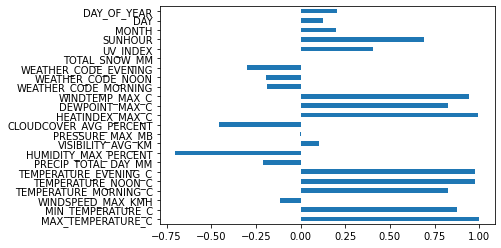

In [9]:
df_weather.corrwith(df_weather['MAX_TEMPERATURE_C']).plot(kind='barh')

# ScatterPlot
Draw a scatterplot with MAX Temperature on Y-axis, and the most correlated column on X-axis

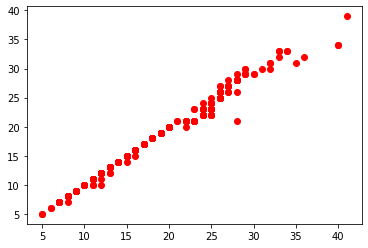

In [10]:
plt.scatter(x = df_weather["HEATINDEX_MAX_C"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red') 
plt.show()


In [11]:
df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

df_weather.corr().unstack().sort_values().drop_duplicates()
#df_temp1=df_corr[(df_corr['MAX_TEMPERATURE_C']>0.7)]
#df_temp2 = df_corr[(df_corr["MAX_TEMPERATURE_C"] <-0.7)]
#df_temp_serie=pd.concat([df_temp1,df_temp2 ])
#df_temp_serie.sort_values(by=['MAX_TEMPERATURE_C'], ascending=False).head(4)


HUMIDITY_MAX_PERCENT    MAX_TEMPERATURE_C       -0.702905
HEATINDEX_MAX_C         HUMIDITY_MAX_PERCENT    -0.692777
CLOUDCOVER_AVG_PERCENT  SUNHOUR                 -0.678550
HUMIDITY_MAX_PERCENT    TEMPERATURE_EVENING_C   -0.676409
TEMPERATURE_NOON_C      HUMIDITY_MAX_PERCENT    -0.673392
                                                   ...   
TEMPERATURE_EVENING_C   MAX_TEMPERATURE_C        0.976796
HEATINDEX_MAX_C         MAX_TEMPERATURE_C        0.993324
MONTH                   DAY_OF_YEAR              0.996504
MAX_TEMPERATURE_C       MAX_TEMPERATURE_C        1.000000
                        TOTAL_SNOW_MM                 NaN
Length: 233, dtype: float64

# Univariate linear regression with NumPy

## Find the equation

In [12]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = df_weather['HEATINDEX_MAX_C'] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = df_weather['MAX_TEMPERATURE_C']



In [13]:
# Then, NumPy calculates automatically coefficient. You just have to execute this code.

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1) #ax+b= l'ecuation de la droite de la regression linéaire


print("What's the type of this model ?, ", type(model))
print("What's inside ?, ", model)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model[0], 3) ," * x  +  ", round(model[1], 3) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [0.93721643 0.74475835]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.937  * x  +   0.745


## Prediction

In [14]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 21.

# Hand calculation :
print("By hand :", model[0] * 21 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(model)(21)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [12, 21, 30]
print("NumPy list of values :  ", np.poly1d(model)(listtest)   )

By hand : 20.426303380116146
NumPy :   20.426303380116146
NumPy list of values :   [11.99135551 20.42630338 28.86125125]


## Scatterplot and linear regression on the same chart

In [15]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()           # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)

In [16]:
# Please display your array. Just execute the code below:
array

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40])

In [17]:
# Please display prediction based on the array-values. Just execute the code below:
np.poly1d(model)(array)

array([ 5.4308405 ,  6.36805693,  7.30527336,  8.24248979,  9.17970622,
       10.11692265, 11.05413908, 11.99135551, 12.92857194, 13.86578837,
       14.8030048 , 15.74022123, 16.67743766, 17.61465409, 18.55187052,
       19.48908695, 20.42630338, 21.36351981, 22.30073624, 23.23795267,
       24.1751691 , 25.11238553, 26.04960196, 26.98681839, 27.92403482,
       28.86125125, 29.79846768, 30.73568411, 31.67290054, 32.61011697,
       33.5473334 , 34.48454983, 35.42176626, 36.35898269, 37.29619912,
       38.23341555])

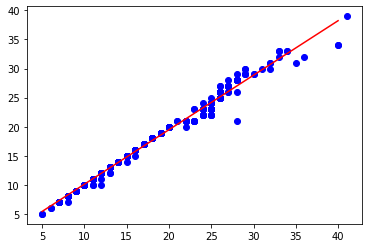

In [18]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis (use np.poly1d function, as previously)
# It's your turn now :
plt.scatter(x = df_weather["HEATINDEX_MAX_C"], y = df_weather["MAX_TEMPERATURE_C"], c= 'blue') 
polynomiale=np.poly1d(model)(array)
plt.plot(array, polynomiale, c='red')
plt.show()

## Compare it with Seaborn
Draw a [regplot with Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), and compare your charts. It's simpler with Seaborn, but you can't access to the coeffeicient...

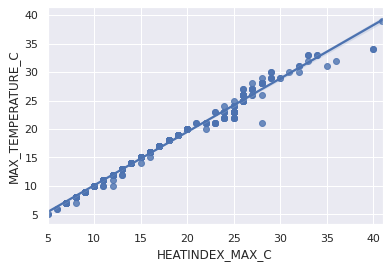

In [19]:
# Your code for the regplot with seaborn here :
import seaborn as sns; sns.set_theme(color_codes=True)

sns.regplot(x='HEATINDEX_MAX_C', y="MAX_TEMPERATURE_C", data=df_weather)

# Polynomial regression

## Create a new model, similar to the previous model, but the X-axis has to be 'Day of the year' column. Y-axis is unchanged (Max Temperature).

Here is an example of expected chart :

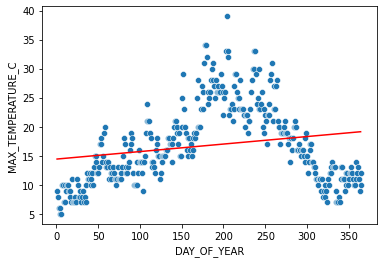


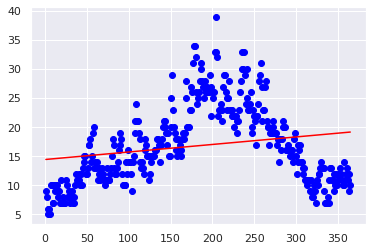

In [20]:
# Follow the same step as previously, to obtain a chart with :
#       blue scatterplot with real values
#       red lineplot with predicted values (linear regression)
#       'Day of the year' on X-axis
#       Max temperature on Y-axis
# Be carefull : we change the X-axis, so you have to define one more time variables Xaxis, Xmin, Xmax and array before create your "polymodel" with "polyfit"
polymodel = np.polyfit(df_weather['DAY_OF_YEAR'], df_weather["MAX_TEMPERATURE_C"], 1) #la regression est de degré 1
plt.scatter( x=df_weather['DAY_OF_YEAR'], y=df_weather['MAX_TEMPERATURE_C'],c='blue')
plt.plot(df_weather['DAY_OF_YEAR'],np.poly1d(polymodel)(df_weather['DAY_OF_YEAR']), c='red' )
plt.show()


## It doesn't seem a good prediction ? Let's try to change the degree (deg argument of the polyfit function)
[More information here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

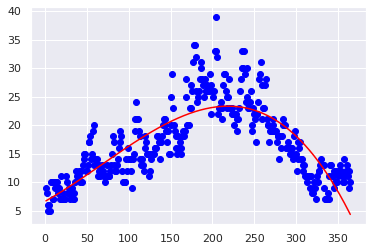

[-1.48138535e-06  2.99764013e-04  8.16576431e-02  6.60852466e+00]


In [21]:
# Copy-paste your code, and just change the "deg" argument to find a better value

polymodel = np.polyfit(df_weather['DAY_OF_YEAR'], df_weather["MAX_TEMPERATURE_C"], 3) #plus tu augmente le degré, plus il utilise le coéfficient pour prédire tes données
plt.scatter( x=df_weather['DAY_OF_YEAR'], y=df_weather['MAX_TEMPERATURE_C'],c='blue')
plt.plot(df_weather['DAY_OF_YEAR'],np.poly1d(polymodel)(df_weather['DAY_OF_YEAR']), c='red' )
plt.show()
print(polymodel)

## Calculate the predicted Max temperature for the day 171
You have to calculate twice :
- by hand
- with numpy function

In [22]:
# Your code here
#print("By hand :", model[0] * 21 + model[1] ) #model=[a,b], donc une liste model[0]=a, model[1]=b
print(polymodel)
print("By hand :", polymodel[0] * 171**3 + polymodel[1]*171**2+polymodel[2]*171+polymodel[3])                                            #je cherce a et b pour réaliser l'écuation ax+b
                                                        #si tu change de degré, tu changes de formule: pour degré 3 c'est model = [a,b,c,d] car l'equation est ax3+bx2+cx+d
# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(171))   #ton résultat est le y



[-1.48138535e-06  2.99764013e-04  8.16576431e-02  6.60852466e+00]
By hand : 21.930141834815313
NumPy :   21.930141834815313


# Yes, you did it ! Now, let's save our work in the DataFrame

## Create a new column in the DataFrame, and find a way to write in this column the predicted values corresponding to the Day of the year column. This method could be usefull to fill missing values or outliers for example.


In [23]:
df_weather['Prediction']=np.poly1d(polymodel)(df_weather['DAY_OF_YEAR'])
df_weather['Prediction']
df_weather.head(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,DAY_OF_YEAR,Prediction
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,1,6.690481
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,2,6.773027
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,3,6.856155
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4,6.939857
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,5,7.024122


In [24]:

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
s = df_weather[["DATE", "MAX_TEMPERATURE_C", "Prediction"]].style.background_gradient(cmap=cm)
s

,DATE,MAX_TEMPERATURE_C,Prediction
0,2019-01-01,9,6.690481
1,2019-01-02,8,6.773027
2,2019-01-03,6,6.856155
3,2019-01-04,5,6.939857
4,2019-01-05,6,7.024122
5,2019-01-06,5,7.108942
6,2019-01-07,10,7.194308
7,2019-01-08,10,7.280212
8,2019-01-09,7,7.366644
9,2019-01-10,7,7.453596
